In [1]:
pwd

'C:\\Users\\MANAY'

In [2]:
import re
#regular expression: provide regular matching operations;RegEx is a sequence of characters that forms a search pattern.

In [3]:
import pandas as pd
#data manipulation and analysis tool using its powerful data structures
import numpy as np
#general purpose array-processing package,it provide high performance multidimensional array object and tools working on it.
import matplotlib.pyplot as plt
import seaborn as sns
#it will bw used in making statistical graphics
import string
#strings in Python are arrays of bytes representing unicode characters
import nltk
#for working with human language data processing
import warnings
#This is the base class of all warning category classes. It handles waring. Program doesn't terminate when warning is encountered
warnings.filterwarnings("ignore", category=DeprecationWarning)
#ignoring disapproval warnings
%matplotlib inline

In [4]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
#label is the target variable 
#tweet contains the tweets that we will clean and preprocess

In [7]:
# 1.we will try to get rid of the punctuations,numbers and special characters.
# 2.small words are of no use as they do not add much value e.g. your, all, the, and. we will try to remove them.
# 3.executed the above steps, we can split every tweet into individual words or tokens.
# which is an essential step in any NLP task.
# 4. We will reduce loves, loving, lovable etc in the data to "love".
# Then we can reduce the total number of unique words in our data without losing a significant amount of information.

# Removing Twitter Handle

In [8]:
combi = train.append(test, ignore_index=True)
#append train and test to remove @user at a time, just reducing the task

C:\Users\MANAY\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [9]:
combi.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [10]:
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern, input_txt)
    for i in r:
        input_txt= re.sub(i,'',input_txt)
        
    return input_txt

# remove tweetter handles (@user)

In [12]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
#

# Remove punctuations, numbers, punctuations

In [13]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [14]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## Removing short words 

In [15]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


## Tokenization

In [17]:
#tolenization all the cleaned tweets in our dataset--splitting a string of text into tokens
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())


In [18]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

## Stemming

In [19]:
#Stemming is a rule based process of stripping the suffixes ("ing","ly","es","s" etc) from a word
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])   #stemming.

In [20]:
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [21]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
    
combi['tidy_tweet']=tokenized_tweet

In [22]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Story Generation  and Visualization from tweets

## Understanding the common words used in the tweets: WordCloud

In [23]:
all_words=' '.join([text for text in combi['tidy_tweet']])

In [24]:
from wordcloud import WordCloud

In [25]:
wordcloud=WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(all_words)

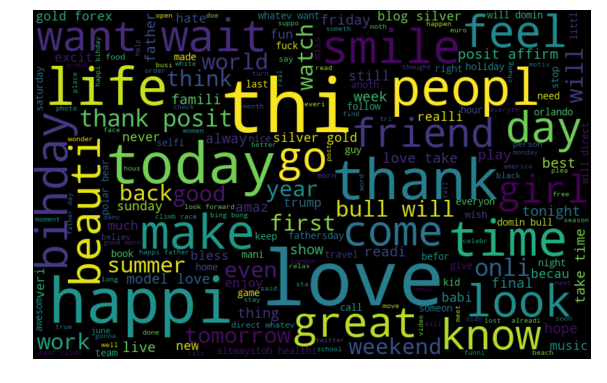

In [26]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Words in non racist/sexist tweets 

In [27]:
normal_words=''.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

In [28]:
wordcloud=WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(normal_words)

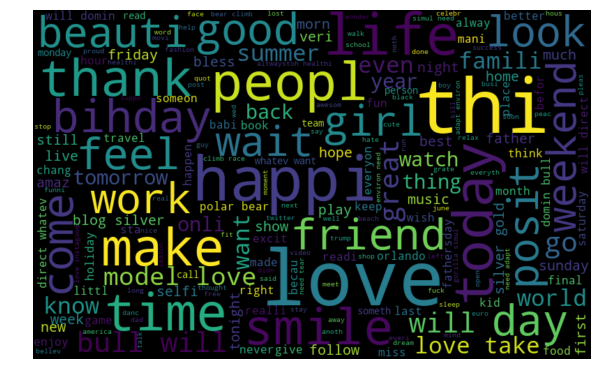

In [29]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Racist/Sexist Tweets

In [30]:
negative_words=''.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])

In [31]:
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)

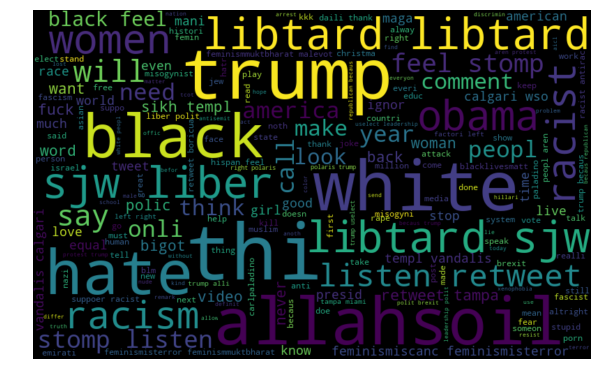

In [32]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Understanding the impact of Hashtags on tweets sentiment

# #HASHTAG 

In [33]:
#function to collect hashtags
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    
    return hashtags

In [34]:
#extracting hashtag from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label']==0])

#extracting hashtag from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label']==1])

#unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

### Non-Racist/Sexist Tweets

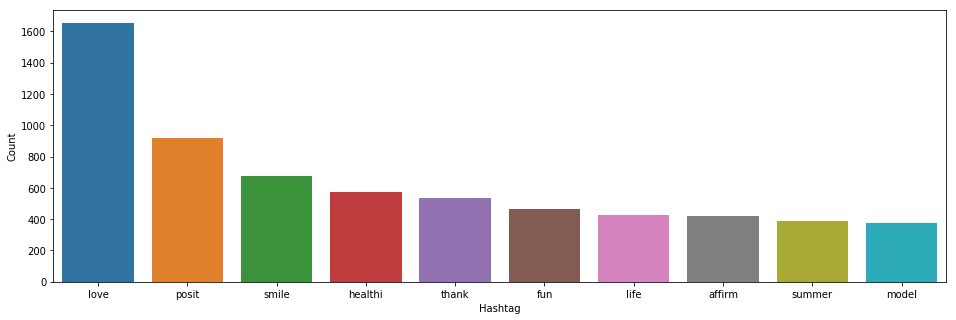

In [35]:
a=nltk.FreqDist(HT_regular)
d=pd.DataFrame({
    'Hashtag':list(a.keys()),
    'Count' : list(a.values())
})
#selecting top 10 most frequent hashtag
d= d.nlargest(columns="Count", n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtag', y='Count')
ax.set(ylabel = 'Count')
plt.show()

### Racist/Sexist tweets 

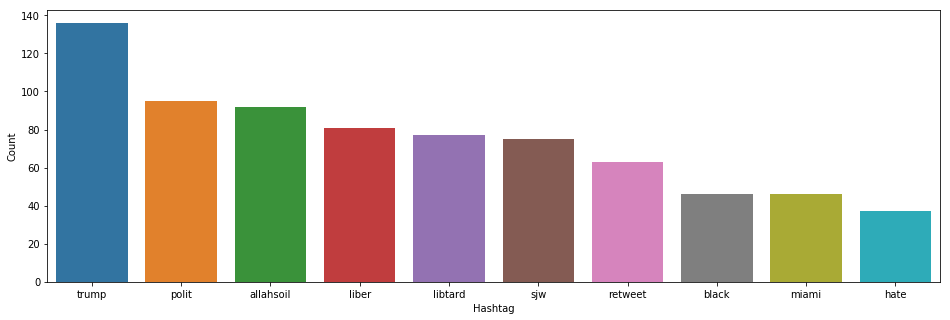

In [36]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({
    'Hashtag': list(b.keys()),
    'Count': list(b.values())
})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# Extracting Features from Clean Tweets 

### Using assorted techniques - Bag-of-words & TF-IDF 

## Building model using Bag-of-Words features

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5307820299500832

In [39]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

## Building Model using TF-IDF features 

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [41]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5446507515473032